# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Analyzing Errors

Analyzing the notebooks that ran into various errors while the script was executing (`github2017-eighth-errors.csv`)

## Loading the .csv file

In [3]:
errors_filepath = 'github2017-eigth-errors.csv'
errors_df = pd.read_csv(errors_filepath)

# initial look at the data
errors_df.head()

,nb_id,repo_id,err_in
0,408548,93282436,api
1,484614,95004508,no_code
2,806977,93647670,api
3,160930,29998194,api
4,964194,72123088,api


## Plotting the error data

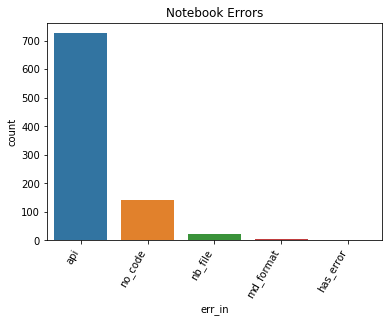

In [4]:
# create a bar plot of the errors column
error_plot = sns.countplot(x='err_in', data=errors_df)

# fix the appearance of the bar plot
temp = error_plot.set_xticklabels(error_plot.get_xticklabels(), rotation=60, ha="right")
temp = error_plot.set(title = "Notebook Errors")

The top three errors (`api`, `no_code`, and `nb_file`) have similar numbers to the previous complete runs.

The `md_format` and `has_error` errors were caused by bugs in `md_formatting` and `has_error` functions, and were fixed.

## Analyzing Adjusted Features

Analyzing the data obtained from running improved feature scripts on the dataset (`github2017-eigth-run.csv`) and comparing those results with previous runs of those feature scripts (`github2017-sixth-run.csv`)

## Loading the .csv files

In [5]:
results_filepath = 'github2017-eigth-run.csv'
results_df = pd.read_csv(results_filepath)

# initial look at the data
results_df.head()

,nb_id,repo_id,longer_beginning,longer_ending,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error,comm_messages,speaking_language
0,900493,85972539,NaN,NaN,NaN,False,1,NaN,0.000000,0.666667,12.666667,False,['borough_month plot'],NaN
1,322852,45655960,NaN,NaN,1.000000,False,2,False,0.000000,1.000000,1.500000,False,"['Added better advice module', 'Reformatted fo...",English
2,457759,27685708,True,False,0.466667,True,3,False,0.000000,1.000000,1.000000,False,"['Add most objects to main module namespace', ...",English
3,672138,92749043,False,False,0.125000,True,2,False,0.043478,0.850000,4.050000,False,"['Update creditcard_classification.ipynb', 'fi...",English
4,103154,30734070,False,False,0.407285,False,1,False,0.000000,0.995495,1.063063,True,['[ch4] Add'],Korean


In [6]:
old_results_filepath = '../sixth-run/github2017-sixth-run.csv'
old_results_df = pd.read_csv(old_results_filepath)

# initial look at the old data
old_results_df.head()

,nb_id,repo_id,longer_beginning,longer_ending,has_author,is_education,language,has_links,has_comments
0,900493,85972539,NaN,NaN,False,False,python,NaN,False
1,322852,45655960,False,False,False,False,python,False,False
2,457759,27685708,True,False,False,False,python,False,False
3,672138,92749043,False,False,False,False,python,True,True
4,103154,30734070,False,False,False,False,python,False,False


The features that were adjusted and whose data will be compared against the sixth run are:

- `longer_beginning`: changed to analyze length by groups of markdown cells instead of singular markdown cells, and only does analysis on notebooks with at least 10 cells
- `longer_ending`: same as above

## Plotting, Cleaning, and Comparing the Data

In [7]:
def clean_column(field, df):
    
    # isolate the right columns
    original = df[['nb_id', 'repo_id', field]]
    
    # filter out the NaN rows
    clean = original.dropna(subset = [field])
    
    # return the cleaned column
    return clean

### Longer Markdown Cells at the Beginning/End

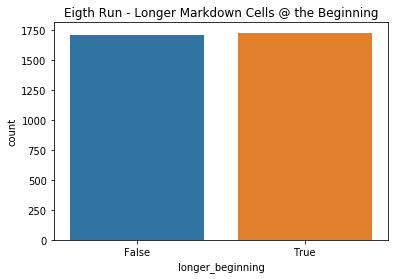

In [8]:
# clean the data
longer_beginning = clean_column('longer_beginning', results_df)

# plot the data
beginning_plot = sns.countplot(x='longer_beginning', data=longer_beginning)

# fix appearance
temp = beginning_plot.set(title = "Eigth Run - Longer Markdown Cells @ the Beginning")

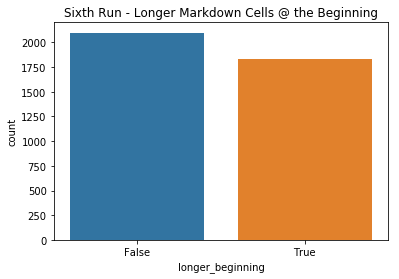

In [9]:
# repeat the same for old results
longer_beginning_old = clean_column('longer_beginning', old_results_df)
beginning_old_plot = sns.countplot(x='longer_beginning', data=longer_beginning_old)
temp = beginning_old_plot.set(title = "Sixth Run - Longer Markdown Cells @ the Beginning")

The plots show that the eigth run categorized many more notebooks as having a longer markdown cell in the beginning. The data is now almost perfectly split in half between those with/without a longer markdown cell in the beginning. This is most likely a result of grouping together markdown cells that were together instead of treating consecutive markdown cells as separate.

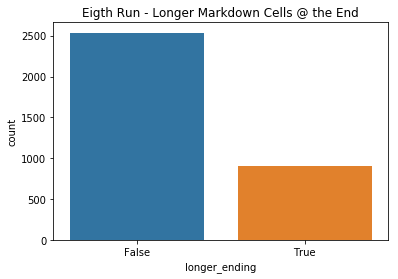

In [10]:
# clean the data
longer_ending = clean_column('longer_ending', results_df)

# plot the data
ending_plot = sns.countplot(x='longer_ending', data=longer_ending)

# fix appearance
temp = ending_plot.set(title = "Eigth Run - Longer Markdown Cells @ the End")

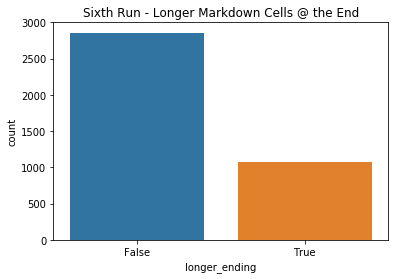

In [11]:
# repeat the same for old results
longer_ending_old = clean_column('longer_ending', old_results_df)
ending_old_plot = sns.countplot(x='longer_ending', data=longer_ending_old)
temp = ending_old_plot.set(title = "Sixth Run - Longer Markdown Cells @ the End")

In [12]:
# count the number of trues for both runs
longer_ending_count = len(results_df[results_df.longer_ending == True])
longer_ending_count_old = len(old_results_df[old_results_df.longer_ending == True])

print("Eigth Run - " + str(longer_ending_count))
print("Sixth Run - " + str(longer_ending_count_old))

Eigth Run - 901
Sixth Run - 1070


Unlike the results reflected in `longer_beginning`, the eigth run categorized slightly less notebooks as having a longer markdown cell at the end of the notebook.

# Analyzing New Features

Analyzing the data obtained from running the new feature scripts on the dataset (`github2017-eigth-run.csv`)

## Loading the .csv file

The .csv file was already loaded in the previous section, so we simply take an initial look at the data again

In [13]:
results_df.head()

,nb_id,repo_id,longer_beginning,longer_ending,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error,comm_messages,speaking_language
0,900493,85972539,NaN,NaN,NaN,False,1,NaN,0.000000,0.666667,12.666667,False,['borough_month plot'],NaN
1,322852,45655960,NaN,NaN,1.000000,False,2,False,0.000000,1.000000,1.500000,False,"['Added better advice module', 'Reformatted fo...",English
2,457759,27685708,True,False,0.466667,True,3,False,0.000000,1.000000,1.000000,False,"['Add most objects to main module namespace', ...",English
3,672138,92749043,False,False,0.125000,True,2,False,0.043478,0.850000,4.050000,False,"['Update creditcard_classification.ipynb', 'fi...",English
4,103154,30734070,False,False,0.407285,False,1,False,0.000000,0.995495,1.063063,True,['[ch4] Add'],Korean


The new features for this run are:

- `md_frequency`: quantifies the frequency of markdown cells by calculating the proportion of cell borders that are between a code and markdown cell
- `has_title`: uses a regex to determine whether or not a header is the first line in the notebook
- `num_commits`: the number of commits related to (changing) the notebook in the repository
- `md_format`: uses a markdown parser to determine whether or not markdown cells in the notebook have "extra" formatting (images, bullet points, quoting)
- `non_exec_prop`: the proportion of code cells that have not been executed
- `exec_inorder`: the proportion of cell borders that have an "inorder" execution order (increasing)
- `exec_skips`: the average size of an execution order skip between cells
- `has_error`: whether the notebook has at least one code cell for which execution resulted in an error
- `comm_messages`: commit messages for the notebook
- `speaking_language`: uses a language detector over the markdown cells to detect the language of the notebook

## Plotting and Cleaining the Data

### Markdown Frequency

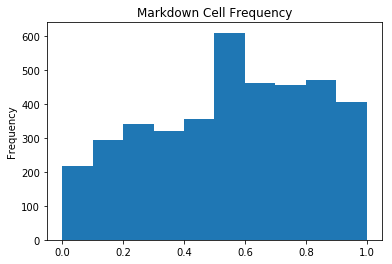

In [14]:
# clean the data
md_frequency = clean_column('md_frequency', results_df)

# plot the data
md_frequency_plot = md_frequency['md_frequency'].plot(kind='hist')

# set title
temp = md_frequency_plot.set_title("Markdown Cell Frequency")

### Notebook Title

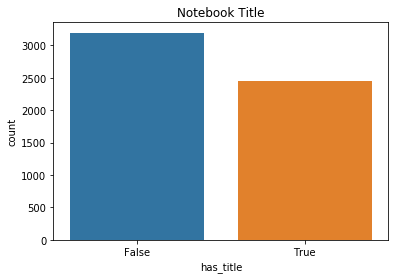

In [15]:
# clean the data
has_title = clean_column('has_title', results_df)

# plot the data
has_title_plot = sns.countplot(x='has_title', data=has_title)

# fix appearance
temp = has_title_plot.set(title = "Notebook Title")

### Number of Notebook Commits

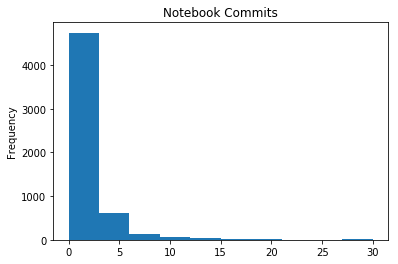

In [16]:
# clean the data
num_commits = clean_column('num_commits', results_df)

# plot the data
num_commits_plot = num_commits['num_commits'].plot(kind='hist')

# set title
temp = num_commits_plot.set_title("Notebook Commits")

### Extra Markdown Formatting

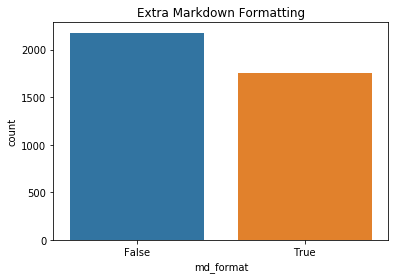

In [17]:
# clean the data
md_format = clean_column('md_format', results_df)

# plot the data
md_format_plot = sns.countplot(x='md_format', data=md_format)

# fix appearance
temp = md_format_plot.set(title = "Extra Markdown Formatting")

### Proportion of Non-Executed Code Cells

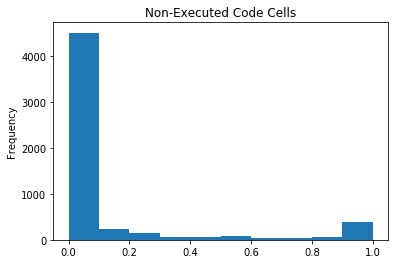

In [18]:
# clean the data
non_exec_prop = clean_column('non_exec_prop', results_df)

# plot the data
non_exec_prop_plot = non_exec_prop['non_exec_prop'].plot(kind='hist')

# set title
temp = non_exec_prop_plot.set_title("Non-Executed Code Cells")

### Inorder Execution

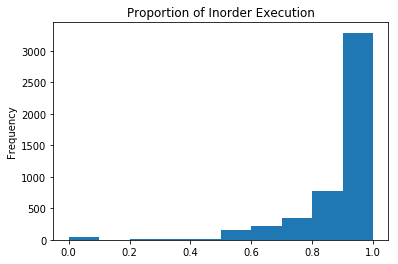

In [19]:
# clean the data
exec_inorder = clean_column('exec_inorder', results_df)

# plot the data
exec_inorder_plot = exec_inorder['exec_inorder'].plot(kind='hist')

# set title
temp = exec_inorder_plot.set_title("Proportion of Inorder Execution")

### Execution Order Skips

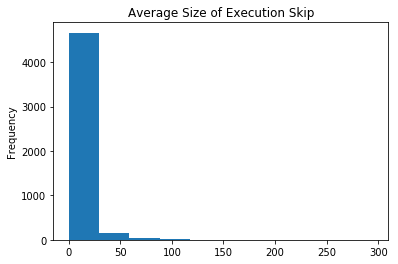

In [20]:
# clean the data
exec_skips = clean_column('exec_skips', results_df)

# plot the data
exec_skips_plot = exec_skips['exec_skips'].plot(kind='hist')

# set title
temp = exec_skips_plot.set_title("Average Size of Execution Skip")

### Error Cells

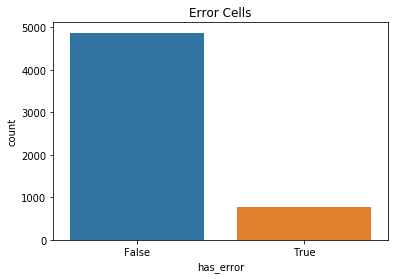

In [21]:
# clean the data
has_error = clean_column('has_error', results_df)

# plot the data
has_error_plot = sns.countplot(x='has_error', data=has_error)

# fix appearance
temp = has_error_plot.set(title = "Error Cells")

### Speaking Langugage

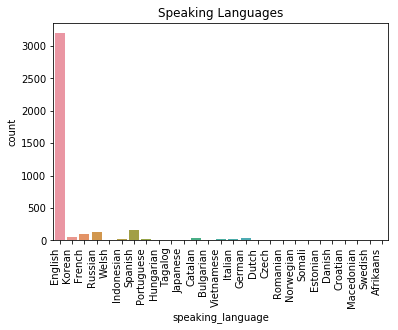

In [22]:
# clean the data
speaking_language = clean_column('speaking_language', results_df)

# create a bar plot of the speaking languages column
speaking_language_plot = sns.countplot(x='speaking_language', data=speaking_language)

# fix the appearance of the bar plot
temp = speaking_language_plot.set_xticklabels(speaking_language_plot.get_xticklabels(), rotation=90, ha="right")
temp = speaking_language_plot.set(title = "Speaking Languages")

# Analyzing Differences

## Longer Markdown Cells in the Beginning

Since this feature has been adjusted for the second time, we determine if the adjustment was effective by extracting the notebooks whose results changed between the sixth and eigth runs for analysis

In [23]:
# gather the rows of the relevant columns 
rows = list(clean_column('longer_beginning', results_df).iterrows())

# define the condition to keep a row
def condition ((_, row)):
    nb_id = row['nb_id']
    old_row = old_results_df.loc[old_results_df['nb_id'] == nb_id]
    try:
        return old_row['longer_beginning'].bool() != row['longer_beginning']
    except:
        return True

# filter the list of rows
differences = list(filter(condition, rows))
differences_ids = list(map(lambda (_, row) : row['nb_id'], differences))

# create a new dataframe with the notebook IDs and the old + new results
differences_df = pd.DataFrame(columns = ['nb_id', 'old_longer_beginning', 'new_longer_beginning'])

# template for rows that will be added to the dataframe
differences_dict = {'nb_id': None, 'old_longer_beginning': None, 'new_longer_beginning': None, 'nb_url': None}

# load in the notebooks_sample.csv to be able to add the nb_url to the output
notebooks_df = pd.read_csv('../../../test-dataset/notebooks_sample.csv')

# add each notebook to the dataframe
for nb_id in differences_ids:
    
    # populate the row dictionary
    differences_dict['nb_id'] = nb_id
    
    row = results_df.loc[results_df['nb_id'] == nb_id]
    try:
        differences_dict['new_longer_beginning'] = row['longer_beginning'].bool()
    except:
        differences_dict['new_longer_beginning'] = None
    
    old_row = old_results_df.loc[old_results_df['nb_id'] == nb_id]
    try:
        differences_dict['old_longer_beginning'] = old_row['longer_beginning'].bool()
    except:
        differences_dict['old_longer_beginning'] = None
        
    nb_url = notebooks_df.loc[notebooks_df['nb_id'] == nb_id]['html_url']
    differences_dict['nb_url'] = str(nb_url.item())
    
    differences_df = differences_df.append(differences_dict, ignore_index = True)

In [24]:
# initial look at the data
differences_df.head()

,nb_id,old_longer_beginning,new_longer_beginning,nb_url
0,625482,False,True,https://github.com/debimax/cours-debimax/blob/...
1,729600,True,False,https://github.com/tuanavu/udacity-course/blob...
2,715173,False,True,https://github.com/debimax/cours-debimax/blob/...
3,358465,True,False,https://github.com/PatrickMockridge/SpringBoar...
4,1086913,False,True,https://github.com/lveronese/capstone/blob/940...


In [25]:
# export the dataframe to a csv
output_path = 'longer_beginning_diff.csv'
differences_df.to_csv(output_path)